# `Module 6`: Post Modelling Activities

### Problem Statement:

* Fashion MNIST is a dataset of Zalando's article images, consisting of 60,000 training examples and 10,000 test examples. 
* Each example is a 28x28 grayscale image, associated with a label from 10 classes. 
* The task is to classify these images into an apparel category amongst 10 categories on which the dataset is benchmarked.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

import torch
import torchvision

from torchvision import transforms, datasets
from torch.utils.data import DataLoader
import torch.nn as nn

In [2]:
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [3]:
manual_transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize(0.5, 0.5)
])

In [4]:
train_data = datasets.FashionMNIST(root='dataset', train=True, download=True, transform=manual_transform)
test_data = datasets.FashionMNIST(root='dataset', train=False, download=True, transform=manual_transform)

100.0%
100.0%
100.0%
100.0%


In [5]:
train_loader = DataLoader(train_data, batch_size=32, shuffle=True)
test_loader = DataLoader(test_data, batch_size=32, shuffle=True)

In [11]:
classes = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']
class_dict = {key:val for key, val in enumerate(classes)}

In [12]:
sample = iter(train_loader)
images, labels = next(sample)

In [14]:
images.shape

torch.Size([32, 1, 28, 28])

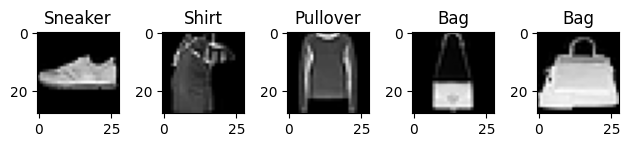

In [27]:
for i in range(5):
    plt.subplot(1, 5, i+1)
    plt.imshow(images[i][0], cmap='gray')
    plt.title(class_dict[labels[i].item()])
    plt.tight_layout()

In [28]:
# create NN Architecture
class FashionMNISTModel(nn.Module):
    def __init__(self):
        super(FashionMNISTModel, self).__init__()

        self.flatten = nn.Flatten()
        self.fc1 = nn.Linear(28*28, 512)
        self.fc2 = nn.Linear(512, 256)
        self.fc3 = nn.Linear(256, 10)
        
        self.relu = nn.ReLU()
        self.softmax = nn.Softmax(dim=1)

    def forward(self, x):
        x = self.flatten(x)
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.softmax(self.fc3(x))
        return x

In [29]:
model = FashionMNISTModel().to(device)

In [30]:
epoch_size = 10
lr = 0.001

In [31]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=lr)

In [32]:
model.train()
for epoch in range(epoch_size):

    total_loss = 0
    for train_img, train_lab in train_loader:
        train_img, train_lab = train_img.to(device), train_lab.to(device)
        pred_train_lab = model(train_img)

        optimizer.zero_grad()
        loss = criterion(pred_train_lab, train_lab)
        loss.backward()
        optimizer.step()

        total_loss += loss.item()
    
    print(f'Epoch {epoch+1}, Loss: {total_loss:.4f}')

Epoch 1, Loss: 3186.3344
Epoch 2, Loss: 3123.4168
Epoch 3, Loss: 3103.1997
Epoch 4, Loss: 3112.6925
Epoch 5, Loss: 3099.5397
Epoch 6, Loss: 3109.7898
Epoch 7, Loss: 3111.6079
Epoch 8, Loss: 3111.5232
Epoch 9, Loss: 3108.4542
Epoch 10, Loss: 3109.4512


In [ ]:
# Save the model
torch.save(model.state_dict(), 'model/fashion_mnist_model.pth')

In [ ]:
# Load the model
model.load_state_dict(torch.load('model/fashion_mnist_model.pth'))

<All keys matched successfully>

In [35]:
model.eval()
with torch.no_grad():
    
    total_correct = 0
    total = 0
    for test_img, test_lab in test_loader:
        test_img, test_lab = test_img.to(device), test_lab.to(device)
        
        output = model(test_img)
        pred_test_lab = torch.argmax(output, dim=1)
        total_correct += (pred_test_lab == test_lab).sum().item()
        total += test_img.size(0)

    print(f"Model Accuracy is {total_correct/total*100:.2f}%")

Model Accuracy is 75.96%
